In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [163]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2021-06-07,35835.265625,36790.570313,33480.640625,33560.707031,3.368394e+10
2021-06-08,33589.519531,34017.386719,31114.443359,33472.632813,4.990205e+10
2021-06-09,33416.976563,37537.371094,32475.865234,37345.121094,5.397292e+10


# Zaczynamy od trendów bo to okres analizy głównej

Do nich dostosujemy okres średnich i linie wsprcia

In [164]:
# Long-term

Start = '2018-05-05'
End = '2019-05-05'
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [166]:
# Sprawdzamy czy pierwsze wystąpiło max_v czy min_v
# Jeśli 1 jest min_v - trend wzrostowy
# Jeśli 1 jest max_v - trend spatkowy
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')
    
# wyznaczamy najniższy punkt jako koniec analizowanego okresu
Max_idx = df1.iloc[Min_pozycja].name

#Pozycja Najwyższej wartościw w indeksie
Ax = df1.iloc[Max_pozycja].name

# Wartość pozycji
Ay = df1['High'].loc[Ax]

A = [Ax, Ay]

df2 = df1[:Max_idx]
while len(df2)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df2.index, y=df2['High'])
    df2 = df2.loc[df2['High'] > slope * df2.index + intercept]
    
Bx = df2.index.max()
By = df2['High'].loc[Bx]
B = [Bx, By]

a = (Ay-By)/(Ax-Bx)

b = By - a*Bx

Cx = df1.index.max() +10
Cy = a*Cx +b
C = [Cx, Cy]

# Linia trendu o współrzędnych X i Y:
X = [A[0], C[0]]
Y = [A[1], C[1]]
print(f'Trend spadkowy. Punkt A : {A}, C: {C}')


Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 0
Trend spadkowy. Punkt A : [17656.0, 9964.5], C: [18031.0, 3091.0105387700605]


In [167]:
B

[17843.0, 6536.919922]

In [168]:
A

[17656.0, 9964.5]

In [169]:
C

[18031.0, 3091.0105387700605]

In [170]:
# trend krótkoterminowy

End = pd.to_datetime(End)

#Data początku trendu krótkoterminowego (6.ms do tyłu)
Start = (End - timedelta(days=30))

End = End.strftime('%Y-%m-%d')

Start = Start.strftime('%Y-%m-%d')

dfk = df.loc[Start:End]

dfk.index=dfk.index.map(mdates.date2num)

Min_pozycja = dfk['Low'].argmin()
Max_pozycja = dfk['High'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')

Maxk_idx = dfk.iloc[Max_pozycja].name

Akx = dfk.iloc[Min_pozycja].name

Aky = dfk['Low'].loc[Akx]

Ak = [Akx, Aky]

dfk2 = dfk[:Maxk_idx]
while len(dfk2)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=dfk2.index, y=dfk2['Low'])
    dfk2 = dfk2.loc[dfk2['Low'] < slope * dfk2.index + intercept]
    
Bkx = dfk2.index.min()
Bky = dfk2['Low'].loc[Bkx]
Bk = [Bkx, Bky]
Bk

a_k = (Aky-Bky)/(Akx-Bkx)
b_k = Aky - (a_k * Akx)

Ckx = dfk.index.max() +10
Cky = a_k* Ckx + b_k

Ck = [Ckx, Cky]

X_k = [Ak[0], Ck[0]]
Y_k = [Ak[1], Ck[1]]
print(f'Trend wzrostowy. Punkt A : {Ak}, punkt B: {Ck}')

Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 0
Trend wzrostowy. Punkt A : [17991.0, 4919.491699], punkt B: [18031.0, 5127.267927571433]


# Średnie ruchome

1. EWM-280 - 280 dni
2. SMA-50 - 50 dni

Z: Musimy rozpocząć analizę biorąc pod uwagę 280 dni do tyłu

Z: Obliczenia dla średniej ceny otwarcia i zamknięcia

In [171]:
#Okres badania trendu długotrminowego
Start = '2018-02-25'
End = '2019-05-05'

In [172]:
Start = pd.to_datetime(Start)
Start = (Start - timedelta(days=280))

End = pd.to_datetime(End)
End = End.strftime('%Y-%m-%d')

Start = Start.strftime('%Y-%m-%d')

dfs = df.loc[Start:End]

In [173]:
dfs['Mean-O/C'] = (dfs['Open'] + dfs['Close'])/2
dfs

,Open,High,Low,Close,Volume,Mean-O/C
Date,,,,,,
2017-05-21,2067.030029,2119.080078,2037.500000,2041.199951,1.147860e+09,2054.114990
2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902,1.942220e+09,2108.294921
2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,1.378750e+09,2255.989991
2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,1.725380e+09,2382.505005
2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2.406700e+09,2375.609985
...,...,...,...,...,...,...
2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10,5376.805909
2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10,5453.853272
2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10,5636.920899


In [174]:
dfs['EWM-280'] = dfs['Mean-O/C'].ewm(span=280).mean()
dfs

,Open,High,Low,Close,Volume,Mean-O/C,EWM-280
Date,,,,,,,
2017-05-21,2067.030029,2119.080078,2037.500000,2041.199951,1.147860e+09,2054.114990,2054.114990
2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902,1.942220e+09,2108.294921,2081.301706
2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,1.378750e+09,2255.989991,2139.947552
2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,1.725380e+09,2382.505005,2201.238164
2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2.406700e+09,2375.609985,2236.612506
...,...,...,...,...,...,...,...
2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10,5376.805909,5128.531354
2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10,5453.853272,5130.861221
2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10,5636.920899,5134.485323


In [175]:
dfs['SMA-50'] = dfs['Mean-O/C'].rolling(window=50).mean()
dfs

,Open,High,Low,Close,Volume,Mean-O/C,EWM-280,SMA-50
Date,,,,,,,,
2017-05-21,2067.030029,2119.080078,2037.500000,2041.199951,1.147860e+09,2054.114990,2054.114990,NaN
2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902,1.942220e+09,2108.294921,2081.301706,NaN
2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,1.378750e+09,2255.989991,2139.947552,NaN
2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,1.725380e+09,2382.505005,2201.238164,NaN
2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2.406700e+09,2375.609985,2236.612506,NaN
...,...,...,...,...,...,...,...,...
2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10,5376.805909,5128.531354,4731.870439
2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10,5453.853272,5130.861221,4762.749858
2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10,5636.920899,5134.485323,4797.188816


In [176]:
# Po dokonaniu obliczeń wracamy do analizowanego okresu i zmieniamy format daty
Start = '2018-02-25'
End = '2019-05-05'
dfs = dfs.loc[Start:End]
dfs.index =dfs.index.map(mdates.date2num)

In [177]:
df1.reset_index(inplace = True)
dfk.reset_index(inplace = True)
dfs.reset_index(inplace = True)

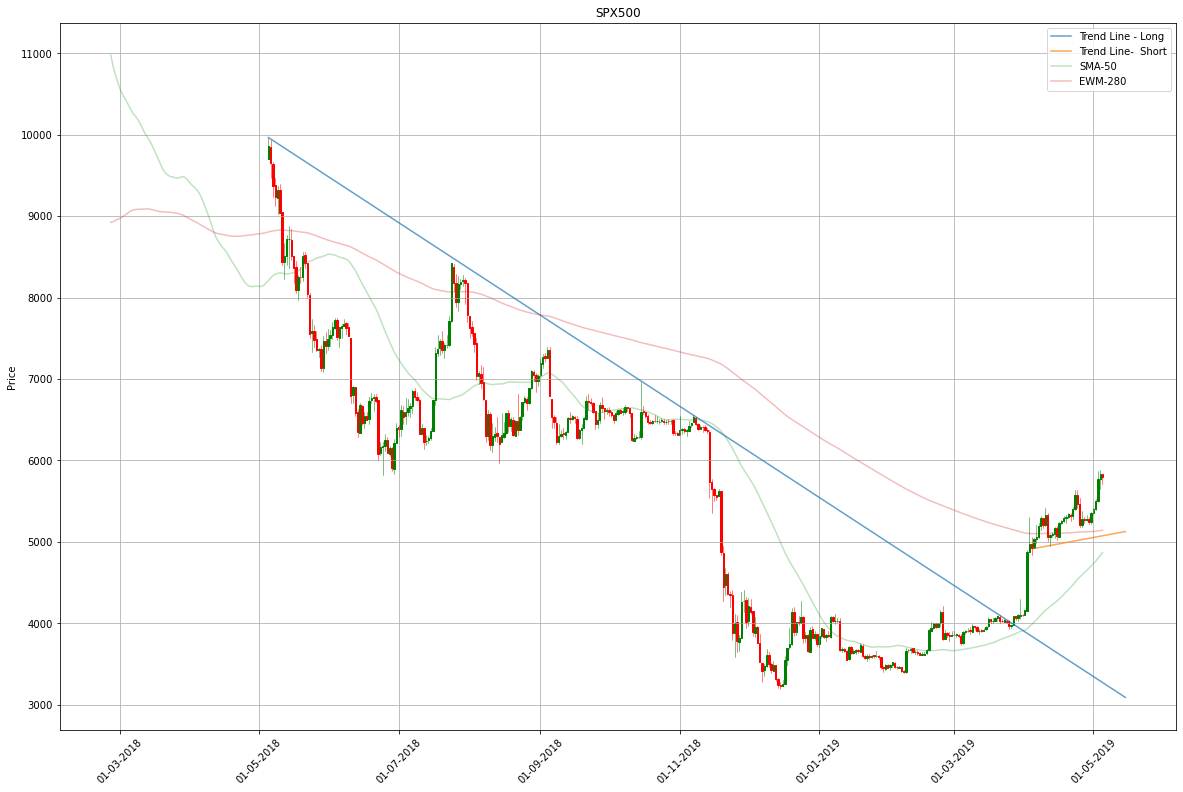

In [178]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)
ax5 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X, Y, label='Trend Line - Long', alpha = 0.7)
ax3.plot(X_k, Y_k, label='Trend Line-  Short', alpha = 0.7)

ax4.plot(dfs['index'], dfs['SMA-50'], label='SMA-50', alpha = 0.3)
ax5.plot(dfs['index'], dfs['EWM-280'], label='EWM-280', alpha = 0.3)

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()